In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import os
import json
import re

import the notebook and use the following functions

results = search_pattern_in_data(pattern, patient_type = "all")
<!--     pattern = list or pandas series of type int -->
find_best_n_matches(results, n)


In [208]:

f1 = open('data/overview/shifted/depressed.json')
avg_dep_data = json.load(f1)
avg_dep_data= avg_dep_data['files']
f2=open('data/overview/shifted/non-depressed.json')
avg_non_dep_data = json.load(f2)
avg_non_dep_data  = avg_non_dep_data['files']

In [209]:
len(avg_dep_data[10]['activity_level'])

1440

In [210]:
len(avg_dep_data)
avg_dep_data

[{'file': 'condition_1',
  'activity_level': [9.93891811745261,
   9.95405833532347,
   9.969220426335115,
   9.984404421381045,
   9.999610351445506,
   10.0148382476058,
   10.030088141034351,
   10.045360063000977,
   10.06065404487536,
   10.075970118129334,
   10.091308314339447,
   10.106668665189662,
   10.122051202473976,
   10.13745595809921,
   10.152882964087977,
   10.168332252581626,
   10.183803855843388,
   10.199297806261603,
   10.214814136353018,
   10.230352878766245,
   10.245914066285371,
   10.261497731833586,
   10.277103908477145,
   10.292732629429162,
   10.308383928053765,
   10.324057837870495,
   10.339754392558435,
   10.355473625960919,
   10.371215572090286,
   10.38698026513252,
   10.402767739452509,
   10.41857802959917,
   10.43441117031079,
   10.450267196520695,
   10.466146143362876,
   10.482048046178052,
   10.497972940519878,
   10.51392086216118,
   10.52989184710058,
   10.545885931569487,
   10.56190315203886,
   10.577943545226699,
   10.59

In [212]:
avg_dep_data[0].keys()

dict_keys(['file', 'activity_level'])

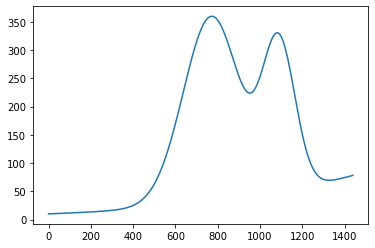

In [213]:
plt.plot(avg_dep_data[0]['activity_level'])

In [233]:
# Pattern search
# global threshold for loss. Lower means tighter fit
global threshold, threshold_2, threshdol_3
threshold = 50
threshold_2 = 0.9
threshold_3 = 60

def close_match(data, pattern):
    loss = 0
    max_match_ratio = 0
    min_loss= 100
    index = -1
    n = len(pattern)
    i = 0
    while (i+n-1<len(data)):
        loss = (np.abs(np.array(data[i:i+n]) - np.array(pattern) ))
       
        within_thresh = loss < threshold
        count = np.count_nonzero(within_thresh)
        ratio = count/len(pattern)
        if ratio >= threshold_2:
            if ratio == max_match_ratio:
                if np.sum(loss)<min_loss:
                    max_match_ratio = ratio
                    index = i
                    min_loss = np.sum(loss)
            if ratio > max_match_ratio:
                max_match_ratio = ratio
                index = i 
                min_loss = np.sum(loss)

                    
                
        i = i+1
    if index != -1:
        return {"index" : index, "max_match_ratio" : max_match_ratio}
    else:
        return -1
    
a = [1, 2, 3, 4, 5, 6, 7]
b = [5,5,6]
print(close_match(a, b))


{'index': 3, 'max_match_ratio': 1.0}


In [257]:
# patient_type = "all", "dep", "nondep" 
def search_pattern_in_data(patient_name, ind_start, ind_end, best_n = 100):
    
    p_type=''
    
    # Depressed
    if re.search("^condition", patient_name) != None:
        for item in avg_dep_data:
            if item['file'] == patient_name:
                pattern = item['activity_level'][ind_start:ind_end]
    
                
    # Not Depressed            
    if re.search("^control", patient_name) != None:
        for item in avg_non_dep_data:
            if item['file'] == patient_name:
                pattern = item['activity_level'][ind_start:ind_end]
              
    
    
    results = []
    ind_s = ind_start - threshold_3
    if ind_s < 0:
        ind_s= 0
    ind_e = ind_end + threshold_3
    if ind_e > 1440:
        ind_e = 1440
    for patient in avg_dep_data:
        res = close_match(patient["activity_level"][ind_s:ind_e], pattern)
#             print(res)
        if res != -1:
            res['patient'] = patient['file']
            res['index'] = res['index'] + ind_s
          
            results.append(res)

    for patient in avg_non_dep_data:
        res = close_match(patient["activity_level"][ind_s:ind_e], pattern)
#             print(res)
        if res != -1:
            res['patient'] = patient['file']
            res['index'] = res['index'] + ind_s
       
            results.append(res)
       
    results = sorted(results, key=lambda d: d['max_match_ratio'], reverse=True)
    
    if len(results) > best_n:
        results=results[:best_n]
    return results
        

In [242]:
a = avg_non_dep_data[12]["activity_level"]
pattern = a[800:1200]
pattern[0] = 320
pattern[73] = 390
avg_non_dep_data[12]['file']

'control_20'

In [262]:
name_list = []
for item in avg_dep_data:
    name_list.append(item['file'])
for item in avg_non_dep_data:
    name_list.append(item['file'])


dep_num = [] 

for item in name_list:
    item = 'condition_3'
    results = search_pattern_in_data(item, 0, 480, 15)
    p_list = [i['patient'] for i in results]
    dep = 0
    for i in p_list:
        if 'condition' in i:
            dep+=1
    break
    dep_num.append(dep)
print(results)
# print(dep_num)
# print(dep_num.index(max(dep_num)))
# print(max(dep_num))




[{'index': 60, 'max_match_ratio': 1.0, 'patient': 'condition_1'}, {'index': 60, 'max_match_ratio': 1.0, 'patient': 'condition_12'}, {'index': 60, 'max_match_ratio': 1.0, 'patient': 'condition_16'}, {'index': 0, 'max_match_ratio': 1.0, 'patient': 'condition_19'}, {'index': 60, 'max_match_ratio': 1.0, 'patient': 'condition_20'}, {'index': 0, 'max_match_ratio': 1.0, 'patient': 'condition_22'}, {'index': 0, 'max_match_ratio': 1.0, 'patient': 'condition_3'}, {'index': 0, 'max_match_ratio': 1.0, 'patient': 'condition_6'}, {'index': 0, 'max_match_ratio': 1.0, 'patient': 'condition_7'}, {'index': 60, 'max_match_ratio': 1.0, 'patient': 'condition_8'}, {'index': 0, 'max_match_ratio': 1.0, 'patient': 'condition_9'}, {'index': 60, 'max_match_ratio': 1.0, 'patient': 'control_1'}, {'index': 60, 'max_match_ratio': 1.0, 'patient': 'control_12'}, {'index': 0, 'max_match_ratio': 1.0, 'patient': 'control_26'}, {'index': 60, 'max_match_ratio': 1.0, 'patient': 'control_3'}]


In [263]:
print(name_list[16])

condition_3


In [264]:
res_names= [i['patient'] for i in results]
res_names

['condition_1',
 'condition_12',
 'condition_16',
 'condition_19',
 'condition_20',
 'condition_22',
 'condition_3',
 'condition_6',
 'condition_7',
 'condition_8',
 'condition_9',
 'control_1',
 'control_12',
 'control_26',
 'control_3']

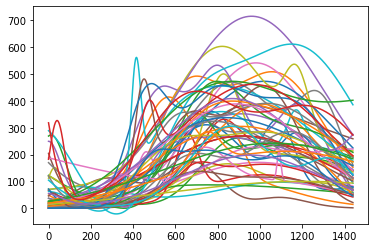

In [218]:
all_dep_act =  [d['activity_level'] for d in avg_dep_data]
all_non_dep_act =  [d['activity_level'] for d in avg_non_dep_data]
all_act_list = all_dep_act + all_non_dep_act
for item in all_act_list:
    plt.plot(item)

In [219]:
a = [[1,2,3], [3,4]]
b = [[1,2,3], [3,4]]
c = a+b
c

[[1, 2, 3], [3, 4], [1, 2, 3], [3, 4]]